In [2]:
from folium import FeatureGroup, LayerControl, Map, Marker, plugins
from folium.plugins import HeatMap
import seaborn as sns
from matplotlib.colors import LogNorm
import copy
FFMPEG_BINARY = "/usr/local/bin/ffmpeg.osx"
import pylab as pl
import imageio
from moviepy.editor import *
from moviepy.Clip import *
from moviepy.video.VideoClip import *
import cv2

In [3]:
import numpy as np
import pandas as pd
import glob
import os
import xml.etree.cElementTree as et
import datetime as dt
from folium import FeatureGroup, LayerControl, Map, Marker
import folium
import math
import geopy.distance

%matplotlib inline  
import matplotlib.pyplot as plt
import pickle


## IMPORT DATA

In [30]:
# Getting all file name in one folder [oneday]
path = "../taxi-201602/20160201"
all_files = glob.glob(os.path.join(path, "*.dat")) #make list of paths
all_files.sort()

In [31]:
all_files

['../taxi-201602/20160201/20160201-000002-10200.dat',
 '../taxi-201602/20160201/20160201-000002-10204.dat',
 '../taxi-201602/20160201/20160201-000019-10559.dat',
 '../taxi-201602/20160201/20160201-000047-11359.dat',
 '../taxi-201602/20160201/20160201-000104-11872.dat',
 '../taxi-201602/20160201/20160201-000105-11901.dat',
 '../taxi-201602/20160201/20160201-000123-12492.dat',
 '../taxi-201602/20160201/20160201-000149-13605.dat',
 '../taxi-201602/20160201/20160201-000205-14355.dat',
 '../taxi-201602/20160201/20160201-000208-14487.dat',
 '../taxi-201602/20160201/20160201-000226-15262.dat',
 '../taxi-201602/20160201/20160201-000251-16339.dat',
 '../taxi-201602/20160201/20160201-000309-17018.dat',
 '../taxi-201602/20160201/20160201-000310-17056.dat',
 '../taxi-201602/20160201/20160201-000330-17937.dat',
 '../taxi-201602/20160201/20160201-000402-19333.dat',
 '../taxi-201602/20160201/20160201-000413-19845.dat',
 '../taxi-201602/20160201/20160201-000413-19851.dat',
 '../taxi-201602/20160201/20

In [32]:
#initial dataframe
dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfcols = ['vehicle_id', 'gpsdata_valid_flag', 'latitude', 'longitude', 'gps_timestamp', 'heading', 'taxi_passenger_flag', 'engine_flag']
df_xml = pd.DataFrame(columns=dfcols)
temp = pd.DataFrame(columns=dfcols)
ind = all_files[0].find('-') +1

In [7]:
def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None   

In [8]:
print(str(dt.datetime.now().time()))
for file in all_files:
#     myString[myString.find("!")+1:myString.find("@")]
#     if(float(file[ind:ind+6])>200000): #16-20 is already add
#         break
#     print(file[ind:ind+6])
    if(  (float(file[ind:ind+6])<200000)):
        continue
    print(file[ind:ind+6])
    
    # reading XML file
    parsedXML = et.parse( file )
    
    for node in parsedXML.getroot():
        vehicle_id = node.find('vehicle_id')
        gpsdata_valid_flag = node.find('gpsdata_valid_flag')
        latitude = node.find('latitude')
        longitude = node.find('longitude')
        gps_timestamp = node.find('gps_timestamp')
        heading = node.find('heading')
        taxi_passenger_flag = node.find('taxi_passenger_flag')
        engine_flag = node.find('engine_flag')
#         datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
        
        temp = temp.append(
            pd.Series([getvalueofnode(vehicle_id), getvalueofnode(gpsdata_valid_flag),
                       getvalueofnode(latitude),
                       getvalueofnode(longitude),
                       getvalueofnode(gps_timestamp),
                       getvalueofnode(heading),
                       getvalueofnode(taxi_passenger_flag),
                       getvalueofnode(engine_flag)], index=dfcols),ignore_index=True)
    # convert gps_timestamp column to datetime
    temp['gps_timestamp'] = pd.to_datetime(temp['gps_timestamp'])
    temp['time'] = [d.time() for d in temp['gps_timestamp']]
    print(len(temp))

### to filter the data that not in range
#### by getting time from filename 
#### then allow just the data 
#### that not slower or faster by 10 min
    getdate = os.path.basename(file)[0:8]
    gettime = os.path.basename(file)[9:15]
    h = int(gettime[0:2])
    m = int(gettime[2:4])
    s = int(gettime[4:6])
    file_timestamp = dt.datetime( int(getdate[0:4]), int(getdate[4:6]), int(getdate[6:8]), h, m, s)
    gap = 5
    min = (file_timestamp - dt.timedelta(minutes=gap))
    max = (file_timestamp + dt.timedelta(minutes=gap))
#     print(min, max)
    
    temp = temp[(temp['gps_timestamp']>min) & (temp['gps_timestamp']<max)]
    
#     if len(df_xml):
#         print('in')
#         df_xml = temp
#     else:
#         df_xml = pd.concat([df_xml, temp])
    df_xml = pd.concat([df_xml, temp])
    print(len(df_xml), len(temp))
    temp.drop(temp.index, inplace=True)
   
    
print(str(dt.datetime.now().time()))

23:44:24.866768
201602
805
782 782
201602
368
1150 368
201602
1000
2146 996
201602
724
2869 723
201602
368
3237 368
201602
804
4018 781
201602
1000
5013 995
201602
724
5736 723
201602
368
6103 367
201602
804
6885 782
201602
1000
7880 995
201602
724
8603 723
201602
368
8971 368
201602
806
9755 784
201602
1000
10751 996
201602
724
11473 722
201602
806
12256 783
201602
368
12624 368
201602
1000
13619 995
201602
724
14342 723
201602
806
15126 784
201602
368
15494 368
201602
1000
16490 996
201602
724
17138 648
201602
806
17922 784
201602
368
18290 368
201602
1000
19285 995
201602
722
19988 703
201602
806
20771 783
201602
368
21139 368
201602
1000
22135 996
201602
723
22857 722
201602
806
23641 784
201602
368
24009 368
201602
1000
25005 996
201602
724
25727 722
201602
806
26511 784
201602
368
26879 368
201602
1000
27875 996
201602
725
28598 723
201602
806
29381 783
201602
368
29749 368
201602
1000
30745 996
201602
725
31467 722
201602
806
32251 784
201602
368
32619 368
201602
1000
33614 995


KeyboardInterrupt: 

In [9]:
df_xml

,engine_flag,gps_timestamp,gpsdata_valid_flag,heading,latitude,longitude,taxi_passenger_flag,time,vehicle_id
0,1,2016-01-31 23:59:11,1,231,13.831255,100.610043,0,23:59:11,GC0365
1,0,2016-01-31 23:59:06,1,88,13.830842,100.543790,0,23:59:06,GC0366
2,1,2016-01-31 23:59:13,1,120,13.688827,100.463162,0,23:59:13,GC0517
3,0,2016-01-31 23:58:58,1,101,13.747465,100.572768,0,23:58:58,GC0463
4,1,2016-01-31 23:59:23,0,192,13.858163,100.526012,0,23:59:23,GC0518
6,0,2016-01-31 23:59:26,1,214,13.833580,100.907002,0,23:59:26,GC0496
8,1,2016-01-31 23:59:28,1,323,13.834588,100.696427,0,23:59:28,GC0497
9,1,2016-01-31 23:59:55,0,294,13.725090,100.543542,0,23:59:55,GC0520
10,1,2016-01-31 23:59:17,0,351,13.724970,100.544295,0,23:59:17,GC0515
11,1,2016-01-31 23:59:38,1,118,13.893785,100.640017,0,23:59:38,GC0523


## CLEAN DATA

In [10]:
# DROPING DUPLICATE VALUE
print(len(df_xml))
df_xml = df_xml.drop_duplicates(subset=['vehicle_id', 'gps_timestamp'], keep='first')
print(len(df_xml))

62287
37339


In [11]:
# DROP INVALID DATA
# drop row that gps data is not available
df_xml = df_xml[df_xml.gpsdata_valid_flag=="1"]
print(len(df_xml))

# drop row that the engine is not in used but the passenger flag is on
df_xml_1 = df_xml[~ ((df_xml.engine_flag == '0') & (df_xml.taxi_passenger_flag == '1'))]
print(len(df_xml_1))

36502
22581


## MODIFY DATA

In [12]:
# ADDING COLUMN 'weekday'
df_xml['weekday']=df_xml['gps_timestamp'].dt.dayofweek
df_xml

,engine_flag,gps_timestamp,gpsdata_valid_flag,heading,latitude,longitude,taxi_passenger_flag,time,vehicle_id,weekday
0,1,2016-01-31 23:59:11,1,231,13.831255,100.610043,0,23:59:11,GC0365,6
1,0,2016-01-31 23:59:06,1,88,13.830842,100.543790,0,23:59:06,GC0366,6
2,1,2016-01-31 23:59:13,1,120,13.688827,100.463162,0,23:59:13,GC0517,6
3,0,2016-01-31 23:58:58,1,101,13.747465,100.572768,0,23:58:58,GC0463,6
6,0,2016-01-31 23:59:26,1,214,13.833580,100.907002,0,23:59:26,GC0496,6
8,1,2016-01-31 23:59:28,1,323,13.834588,100.696427,0,23:59:28,GC0497,6
11,1,2016-01-31 23:59:38,1,118,13.893785,100.640017,0,23:59:38,GC0523,6
12,1,2016-01-31 23:59:39,1,265,13.815015,100.419175,0,23:59:39,GC0514,6
16,1,2016-01-31 23:59:36,1,182,13.893867,100.377967,0,23:59:36,GC0585,6
21,1,2016-01-31 23:59:44,1,1,13.918787,100.717240,0,23:59:44,GC0577,6


In [13]:
# SORTING TABLE
df_xml = df_xml.sort_values(['vehicle_id', 'gps_timestamp'])

In [14]:
# TYPEING TABLE COLUMN
df_xml[['latitude', 'longitude', 'heading']] = df_xml[['latitude', 'longitude', 'heading']].astype(float)
df_xml.dtypes

engine_flag                    object
gps_timestamp          datetime64[ns]
gpsdata_valid_flag             object
heading                       float64
latitude                      float64
longitude                     float64
taxi_passenger_flag            object
time                           object
vehicle_id                     object
weekday                         int64
dtype: object

### save data to object

In [27]:
filehandler = open('object_data/df_20160201.obj', 'wb') 
pickle.dump(df_xml, filehandler)

# <span style="color: red; background: yellow"> RUN HERE !!! </span>

### read data to object

In [16]:
filehandler = open('object_data/df_20160201.obj', 'rb') 
df_xml = pickle.load(filehandler)

TypeError: a bytes-like object is required, not 'str'

In [17]:
df_xml#.shape

,engine_flag,gps_timestamp,gpsdata_valid_flag,heading,latitude,longitude,taxi_passenger_flag,time,vehicle_id,weekday
458,0,2016-01-31 23:58:16,1,285.0,13.954460,100.741399,0,23:58:16,AK2301,6
457,0,2016-02-01 00:01:16,1,285.0,13.954460,100.741399,0,00:01:16,AK2301,0
458,0,2016-02-01 00:04:16,1,285.0,13.954460,100.741399,0,00:04:16,AK2301,0
458,0,2016-02-01 00:07:16,1,285.0,13.954460,100.741399,0,00:07:16,AK2301,0
458,0,2016-02-01 00:10:16,1,285.0,13.954460,100.741399,0,00:10:16,AK2301,0
458,0,2016-02-01 00:13:16,1,285.0,13.954460,100.741399,0,00:13:16,AK2301,0
457,0,2016-02-01 00:16:16,1,285.0,13.954460,100.741399,0,00:16:16,AK2301,0
458,0,2016-02-01 00:19:16,1,285.0,13.954460,100.741399,0,00:19:16,AK2301,0
479,0,2016-01-31 23:57:37,1,144.0,13.778721,100.679166,1,23:57:37,AK2306,6
478,0,2016-02-01 00:00:37,1,144.0,13.778721,100.679166,1,00:00:37,AK2306,0


### read 'O-D' data
- each trip has 2 record 
    - Origin
    - Destination

In [19]:
filehandler = open('object_data/taxidata.obj', 'r') 
dataod = pickle.load(filehandler)

TypeError: a bytes-like object is required, not 'str'

## ANALYISE DATA

** 0. parking <br/>
toplot.loc[(toplot['dist'] < 0.2) & (toplot['disp'] < 0.2) , 'flag'] = 0

** 1. driving along <br/>
toplot.loc[(toplot['disp'] > 0.2) & (toplot['dist']) , 'flag' ] = 1

** 2. drive more than 300 m. with speed :: driving to find passenger with direct destination <br/>
toplot.loc[(toplot['dist']>0.3)&((toplot['dist']/toplot['time']) > 40)] = 2 

** 3. time is lower than 3 min :: passenger destination is in popular area <br/>
toplot.loc[(toplot['time']<=0.05), 'flag'] = 3

** 4. driving around : distance >> displacement :: driving around for passenger <br/>
toplot.loc[(toplot['dist']/2 > toplot['disp'])] = 4



In [20]:
# initial variable
previd = ""
route = pd.DataFrame(columns=['coordinate', 'timestamp', 'heading'])
heading_diff = pd.DataFrame(columns=['diff', 'heading_cal'])
lines = []
points= []
heading_sum=0
heading_sum_cal = 0
startmorningrushhour = dt.time(6, 0, 0)
endmorningrushhour = dt.time(9, 30, 0)
starteveningrushhour = dt.time(15, 30, 0)
endeveningrushhour = dt.time(21, 0, 0)
drivedist = pd.DataFrame(columns=['disp', 'dist', 'weekday', 'partofday', 'time'])
color = ['#000000', '#0043FF', '#F24FE6', '#38FF33', '#EAFF00']
index = 0
count = 0
feature_group = []
for i in range(5):
    feature_group.append(folium.FeatureGroup(name='flag === '+str(i)))

gen_col = ['taxi_id', 'timestamp', 'distance', 'displacement', 'trip_time', 'trip_id', 'heading_all', 'direction', 'line']
gen_data = pd.DataFrame(columns=gen_col)

In [21]:
def routeCalculating(route, heading_sum_cal, row, direction):
#     append data to gen_data table
    flag = 0
    global drivedist
    global color
    global gen_data
    num = len(route)
    disp=0
    if(num>0):
        disp=geopy.distance.vincenty(route.coordinate[0], route.coordinate[num-1]).km
#     time=(dt.datetime.min + (route.timestamp[num-1]-route.timestamp[0])).time()
    dist=0
    for j in range(num-1):
        dist = dist + geopy.distance.vincenty(route.coordinate[j], route.coordinate[j+1]).km

    time_diff = (route.timestamp[num-1]-route.timestamp[0]).total_seconds()
    line = route.coordinate.to_json(orient='records')
    heading_all = math.degrees(circ_mean(route.heading))
    gen_data = gen_data.append({'taxi_id': row.vehicle_id, 'timestamp': route.timestamp[0], 'distance': dist, 'displacement': disp, 'trip_time': time_diff, 'trip_id': '000','heading_all': heading_all, 'direction': direction, 'line': line}, ignore_index=True)


In [22]:
def angleFromCoordinate(lat1, long1, lat2, long2): 
    # function cal heading : 
    ### North 0degree 
    ### East 90degree 
    ### South 180 degree
    ### West 270 degree
    dLon = (long1 - long2)

    y = math.sin(dLon) * math.cos(lat1)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)

    brng = math.atan2(y, x)

    brng = math.degrees(brng)
    brng = (brng + 360) % 360
    brng = 360 - brng # count degrees clockwise - remove to make counter-clockwise

    return brng

print(angleFromCoordinate(13.741229, 100.554225, 13.741319, 100.553225))

283.1604160173639


##### round heading angle
ref : https://community.esri.com/blogs/dan_patterson/2016/01/10/circular-mean-for-directional-data

In [23]:
def circ_mean(angles):  
    """angles in degrees" 
    """  
    cosList = []  
    cosSum = 0.0  
    sinSum = 0.0  
    for i in angles:  
        if(i == None): continue
        theCos = math.cos(math.radians(float(i)))  
        theSin = math.sin(math.radians(float(i)))  
        cosSum += theCos  
        sinSum += theSin  
    N = len(angles)  
    C = cosSum/N  
    S = sinSum/N  
    theMean = math.atan2(S,C)  
    if theMean < 0.0:  
        theMean += math.radians(360.0)  
    return theMean
print(circ_mean([None, 350, 10]),math.degrees(circ_mean([None, 350, 10])))

6.283185307179586 360.0


In [24]:
df_xml_temp =df_xml[(df_xml['gps_timestamp'].dt.hour >=6) & (df_xml['gps_timestamp'].dt.hour <9)]

In [25]:
taxi_id = df_xml.vehicle_id.unique()
route_collection=pd.DataFrame()
type(route_collection)
zero_count = []

In [26]:
gen_data

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line


In [27]:
#initial map
mmmap = folium.Map(location=[13.741229, 100.554225], zoom_start=14, tiles='cartodbpositron')
gen_col = ['taxi_id', 'timestamp', 'distance', 'displacement', 'trip_time', 'trip_id', 'heading_all', 'direction', 'line']
gen_data = pd.DataFrame(columns=gen_col)
flag = True
for car in taxi_id:
    if((car == 'AK4233') ):
        break
    
    temp_df = df_xml[df_xml.vehicle_id == car]

    print(car, len(temp_df))

    state= 'start'
    route = pd.DataFrame(columns=['coordinate', 'timestamp', 'heading'])
    # route=route.append({'coordinate':[float(row.latitude)] + [float(row.longitude)], 'timestamp': row.gps_timestamp, 'heading': None}, ignore_index=True)
    count=0
    for i,row in temp_df.iterrows():
        if((row.taxi_passenger_flag == '0') & (state == 'start')):
     #         ignore : waiting for passenger_flag 1
            state = 'waiting'
        elif((row.taxi_passenger_flag == '1')):
     #         play with it
            if(state == 'waiting'):
                cal = None
                state='checking'
                count+=1
            elif(state=='checking'):
                num = len(route)
                cal = angleFromCoordinate( route.coordinate[num-1][0], route.coordinate[num-1][1], row.latitude, row.longitude)

            route=route.append({'coordinate':([float(row.latitude)] + [float(row.longitude)]), 'timestamp': row.gps_timestamp, 'heading': row.heading}, ignore_index=True)

     #         count += 1
        elif((row.taxi_passenger_flag == '0')):
            count +=1000
            num=len(route)
            direction=None
            if(num>0):
                direction = angleFromCoordinate(route.coordinate[0][0], route.coordinate[0][1], route.coordinate[num-1][0], route.coordinate[num-1][1])
                routeCalculating(route, heading_sum_cal, row, direction)

            route = pd.DataFrame(columns=['coordinate', 'timestamp', 'heading'])
     #         route=route.append({'coordinate':[float(row.latitude)] + [float(row.longitude)], 'timestamp': row.gps_timestamp, 'heading': None}, ignore_index=True)

            state = 'waiting'
    print(count)


AK2301 8
7000
AK2306 10
0
AK2438 8
7000
AK2472 19
0
AK2756 22
15001
AK2758 8
0
AK2759 19
18000
AK2760 8
7000
AK2762 8
0
AK2763 8
7000
AK2764 22
21000
AK2765 22
21000
AK2766 8
7000
AK2770 21
13000
AK2771 18
8001
AK2772 8
0
AK2773 8
0
AK2774 19
17000
AK2775 9
0
AK2778 18
17000
AK2779 8
0
AK2780 8
0
AK2782 8
0
AK2783 9
0
AK2784 22
4000
AK2785 8
0
AK2786 8
0
AK2787 9
8000
AK2788 8
0
AK2789 8
0
AK2790 9
0
AK2791 8
0
AK2792 11
0
AK2793 22
21000
AK2794 22
21000
AK2795 8
0
AK2796 8
0
AK2797 9
0
AK2798 9
0
AK2799 8
0
AK2801 9
0
AK2803 9
0
AK2804 9
0
AK2805 9
0
AK2806 8
0
AK2807 22
11001
AK2808 7
0
AK2809 22
21000
AK2810 17
0
AK2811 9
0
AK2812 18
0
AK2813 12
0
AK2815 8
0
AK2816 9
8000
AK2817 13
12000
AK2818 9
0
AK2819 8
7000
AK2830 9
0
AK2831 9
8000
AK2832 8
0
AK2835 8
0
AK2836 8
7000
AK2837 8
7000
AK2849 9
8000
AK2852 20
8001
AK2853 8
0
AK2854 8
0
AK2856 8
0
AK2857 22
0
AK2858 9
0
AK2859 8
0
AK2860 22
12000
AK2861 8
0
AK2862 15
4002
AK2863 8
0
AK2864 8
0
AK2865 8
0
AK2866 8
0
AK2867 9
0
AK2868 

0
AK3595 7
0
AK3596 22
10003
AK3597 8
0
AK3598 8
0
AK3599 22
21000
AK3600 20
5001
AK3601 17
1001
AK3603 21
9002
AK3604 8
7000
AK3605 22
5001
AK3606 21
9001
AK3607 8
7000
AK3608 8
0
AK3609 8
0
AK3610 9
0
AK3611 9
0
AK3612 20
7001
AK3613 8
0
AK3614 19
2000
AK3615 20
19000
AK3616 8
0
AK3617 20
19000
AK3618 8
0
AK3619 22
21000
AK3620 9
0
AK3621 9
0
AK3622 8
0
AK3623 21
0
AK3628 22
4002
AK3629 22
21000
AK3630 17
15001
AK3632 8
0
AK3633 8
0
AK3634 8
7000
AK3635 8
7000
AK3636 9
8000
AK3637 22
8002
AK3638 22
5000
AK3639 22
13001
AK3640 21
17001
AK3641 9
8000
AK3642 9
8000
AK3643 9
0
AK3644 9
0
AK3645 8
0
AK3646 8
0
AK3647 9
0
AK3648 8
0
AK3649 8
0
AK3650 8
0
AK3652 22
0
AK3653 17
0
AK3654 9
0
AK3655 22
0
AK3656 8
0
AK3657 6
0
AK3658 9
0
AK3659 21
0
AK3660 16
0
AK3661 9
0
AK3662 22
0
AK3663 9
0
AK3664 9
0
AK3665 8
0
AK3666 9
0
AK3667 8
0
AK3668 8
0
AK3669 8
0
AK3670 8
0
AK3671 8
0
AK3672 8
0
AK3673 9
0
AK3674 10
2001
AK3675 9
0
AK3676 22
0
AK3677 8
0
AK3678 8
0
AK3679 21
0
AK3680 8
0
AK3681 8
0

### save gen_data as an object

In [13]:
filehandler = open('object_data/gen_data.obj', 'wb') 
pickle.dump(gen_data, filehandler)

In [20]:
# count_trip
filehandler = open('object_data/count_trip.obj', 'wb') 
pickle.dump(count_trip, filehandler)

# <span style="color: red; background: yellow"> RUN HERE !!! </span>

## read object to gen_data

In [28]:
filehandler = open('object_data/gen_data.obj', 'rb') 
gen_data = pickle.load(filehandler)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc9 in position 2: ordinal not in range(128)

In [33]:
gen_data

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line
0,AK2770,2016-02-01 00:00:07,3.374915,2.901152,420.0,000,217.976967,219.253540,"[[13.724985,100.456752],[13.721133,100.458168]..."
1,AK2774,2016-01-31 23:59:16,0.000000,0.000000,0.0,000,330.000000,360.000000,"[[13.787786,100.691942]]"
2,AK2784,2016-01-31 23:59:45,16.377471,16.252548,1020.0,000,82.658874,78.361432,"[[13.712228,100.643898],[13.713968,100.647192]..."
3,AK2807,2016-02-01 00:08:36,5.024445,4.670281,541.0,000,155.284483,174.947926,"[[13.818931,100.559404],[13.815329,100.559406]..."
4,AK2852,2016-02-01 00:00:04,0.725418,0.725013,120.0,000,176.012765,180.543222,"[[13.827836,100.59182],[13.82425,100.59182],[1..."
5,AK2852,2016-02-01 00:10:04,3.436178,2.221416,420.0,000,62.005997,29.053867,"[[13.8298,100.57307],[13.831682,100.575562],[1..."
6,AK2860,2016-01-31 23:59:38,4.361275,3.199557,540.0,000,95.023875,73.625928,"[[13.710083,100.629198],[13.710946,100.636918]..."
7,AK2862,2016-02-01 00:05:59,0.000000,0.000000,180.0,000,275.000000,360.000000,"[[13.755765,100.567154],[13.755765,100.567154]]"
8,AK2875,2016-01-31 23:59:29,3.467152,2.364637,1080.0,000,4.078487,357.042312,"[[13.596174,100.609627],[13.595867,100.606674]..."
9,AK2890,2016-01-31 23:58:05,5.365110,4.550068,1014.0,000,135.305863,155.612043,"[[13.7388,100.534672],[13.738208,100.534851],[..."


In [34]:
gen_data.dtypes

taxi_id                 object
timestamp       datetime64[ns]
distance               float64
displacement           float64
trip_time              float64
trip_id                 object
heading_all            float64
direction              float64
line                    object
dtype: object

In [35]:
gen_data['hour'] = gen_data['timestamp'].dt.hour

In [36]:
gen_data

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line,hour
0,AK2770,2016-02-01 00:00:07,3.374915,2.901152,420.0,000,217.976967,219.253540,"[[13.724985,100.456752],[13.721133,100.458168]...",0
1,AK2774,2016-01-31 23:59:16,0.000000,0.000000,0.0,000,330.000000,360.000000,"[[13.787786,100.691942]]",23
2,AK2784,2016-01-31 23:59:45,16.377471,16.252548,1020.0,000,82.658874,78.361432,"[[13.712228,100.643898],[13.713968,100.647192]...",23
3,AK2807,2016-02-01 00:08:36,5.024445,4.670281,541.0,000,155.284483,174.947926,"[[13.818931,100.559404],[13.815329,100.559406]...",0
4,AK2852,2016-02-01 00:00:04,0.725418,0.725013,120.0,000,176.012765,180.543222,"[[13.827836,100.59182],[13.82425,100.59182],[1...",0
5,AK2852,2016-02-01 00:10:04,3.436178,2.221416,420.0,000,62.005997,29.053867,"[[13.8298,100.57307],[13.831682,100.575562],[1...",0
6,AK2860,2016-01-31 23:59:38,4.361275,3.199557,540.0,000,95.023875,73.625928,"[[13.710083,100.629198],[13.710946,100.636918]...",23
7,AK2862,2016-02-01 00:05:59,0.000000,0.000000,180.0,000,275.000000,360.000000,"[[13.755765,100.567154],[13.755765,100.567154]]",0
8,AK2875,2016-01-31 23:59:29,3.467152,2.364637,1080.0,000,4.078487,357.042312,"[[13.596174,100.609627],[13.595867,100.606674]...",23
9,AK2890,2016-01-31 23:58:05,5.365110,4.550068,1014.0,000,135.305863,155.612043,"[[13.7388,100.534672],[13.738208,100.534851],[...",23


In [12]:
mmmap = folium.Map(location=[13.741229, 100.554225], zoom_start=14, tiles='cartodbpositron')

0


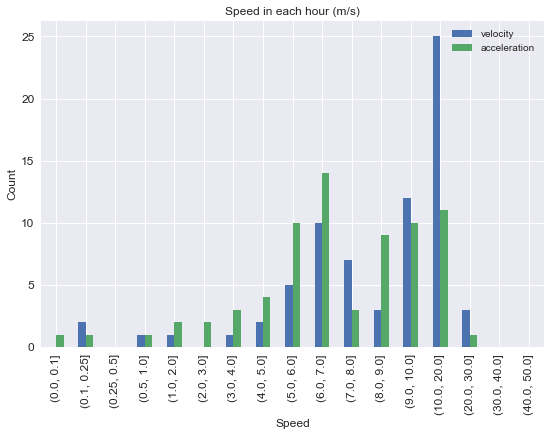

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


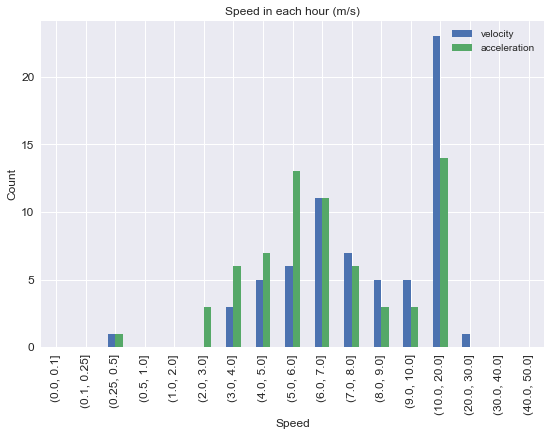

In [37]:
cut=[0, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
type1_cut=[]
type2_cut=[]
count=0
fig = plt.figure()
for i in range(24):
    temp = gen_data[gen_data.timestamp.dt.hour == i]
    li_velo=[]
    li_acce=[]
    type1_temp=0
    type2_temp=pd.DataFrame(columns=['ratio', 'diff_direct', 'diff_dist'])
    print(str(i))
    for index, data in temp.iterrows():
        if(data.trip_time>0):
            li_velo.append(data.distance*1000/data.trip_time)
            li_acce.append(data.displacement*1000/data.trip_time)
        if(data.displacement>0):
            t = abs(data.heading_all-data.direction)
            if(t > 180): t -= 180
            diff_dist=(data.distance-data.displacement)
            type2_temp = type2_temp.append({'ratio':(data.distance/data.displacement), 'diff_direct': t/12, 'diff_dist': diff_dist},ignore_index=True)
            if( (t<20) &(diff_dist > 2) & (data.distance*1000/data.trip_time >0.25)):
                s = (str(t)+' '+str(diff_dist))
#                 print(s)
#                 f = folium.FeatureGroup(name=s)
#                 data.line.add_to(f)
#                 f.add_to(mmmap)
                count+=1
    if((len(li_velo)>0) & (len(li_acce)>0)):
        plot_velo = pd.DataFrame.from_dict({'velocity': li_velo})
        plot_velo = plot_velo.groupby(pd.cut(plot_velo['velocity'], cut)).count()
        plot_acce = pd.DataFrame.from_dict({'acceleration': li_acce})
        plot_acce = plot_acce.groupby(pd.cut(plot_acce['acceleration'], cut)).count()
        plot = plot_velo
        plot['acceleration'] = plot_acce['acceleration']
        ax=plot[['velocity', 'acceleration']].plot(kind='bar', title ="Speed in each hour (m/s)", figsize=(9,6), legend=True, fontsize=12)
        ax.set_xlabel("Speed", fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        plt.show()
        temp_c = 0
        for n,c in plot_acce.iterrows():
            
            if(c.acceleration-temp_c > 0):
                type1_temp = n
                temp_c = c.acceleration
            else: break
    if(len(type2_temp) > 0):
        type2_temp=type2_temp.sort_values(['ratio', 'diff_direct'])
#         fig = plt.figure(figsize=(15,6))
#         print(np.mean(type2_temp['ratio'].tolist()))
        ax = fig.add_subplot(6,4,i+1)
        ax.plot( type2_temp['ratio'].tolist(), alpha=0.6)
        ax.plot( type2_temp['diff_direct'].tolist(), alpha=0.6)
        ax.plot( type2_temp['diff_dist'].tolist(), alpha=0.6)
#         plt.title("Difference between distance and displacement")
#         plt.ylabel('path diff')
#         plt.xlim(0, 20)
#         ax.ylim(0,15)
        
    
    type2_cut.append(np.mean(type2_temp['ratio'].tolist()) if len(type2_temp>0) else 0)
    type1_cut.append(type1_temp)
# plt.tight_layout()
plt.show()

In [39]:
count

12

# calculate

In [42]:
gen_data

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line,hour
0,AK2770,2016-02-01 00:00:07,3.374915,2.901152,420.0,000,217.976967,219.253540,"[[13.724985,100.456752],[13.721133,100.458168]...",0
1,AK2774,2016-01-31 23:59:16,0.000000,0.000000,0.0,000,330.000000,360.000000,"[[13.787786,100.691942]]",23
2,AK2784,2016-01-31 23:59:45,16.377471,16.252548,1020.0,000,82.658874,78.361432,"[[13.712228,100.643898],[13.713968,100.647192]...",23
3,AK2807,2016-02-01 00:08:36,5.024445,4.670281,541.0,000,155.284483,174.947926,"[[13.818931,100.559404],[13.815329,100.559406]...",0
4,AK2852,2016-02-01 00:00:04,0.725418,0.725013,120.0,000,176.012765,180.543222,"[[13.827836,100.59182],[13.82425,100.59182],[1...",0
5,AK2852,2016-02-01 00:10:04,3.436178,2.221416,420.0,000,62.005997,29.053867,"[[13.8298,100.57307],[13.831682,100.575562],[1...",0
6,AK2860,2016-01-31 23:59:38,4.361275,3.199557,540.0,000,95.023875,73.625928,"[[13.710083,100.629198],[13.710946,100.636918]...",23
7,AK2862,2016-02-01 00:05:59,0.000000,0.000000,180.0,000,275.000000,360.000000,"[[13.755765,100.567154],[13.755765,100.567154]]",0
8,AK2875,2016-01-31 23:59:29,3.467152,2.364637,1080.0,000,4.078487,357.042312,"[[13.596174,100.609627],[13.595867,100.606674]...",23
9,AK2890,2016-01-31 23:58:05,5.365110,4.550068,1014.0,000,135.305863,155.612043,"[[13.7388,100.534672],[13.738208,100.534851],[...",23


### type 1 - parking - stop at the point 
totally stop. or just little moving.

In [43]:
def check_type1(data, cut_value):
#     print(data.displacement*1000, cut_value*data.trip_time)
    if(data.displacement==0):
        return True
    if((data.distance - data.displacement)*1000<cut_value):
        if((data.trip_time > 5*60) or (data.distance*1000 > cut_value* data.trip_time)):
            return False
        return True
    if(data.distance*1000/data.trip_time < cut_value):
        if(data.displacement*1000 > cut_value * data.trip_time):
            return False
        return True
    elif((data.distance == 0) or (data.displacement==0)):
        return True
    elif(data.trip_time/60 < 3):
        return True
    else: return False

In [ ]:

mmap = folium.Map(location=[13.741229, 100.554225], zoom_start=14, tiles='cartodbpositron')

In [44]:

feature_1 = folium.FeatureGroup(name='type1 - parking')
to_plot1 = []
for h in range(24): # of hours in a day
    temp_df = gen_data[gen_data['timestamp'].dt.hour == h]
    count=0
    type1_cut_value = 0
    if(type(type1_cut[h]) != int):
        type1_cut_value = type1_cut[h].right
    for ti, td in temp_df.iterrows():
        
        if(td.trip_time == 0):
            count+=1
#             td.line.add_to(mmap)
        elif(check_type1(td, type1_cut_value)):
            print('in')
            count+=1
#             td.line.add_to(mmap)
    to_plot1.append(count)
#     if(h == 5): break



in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in


In [45]:
to_plot1

[29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28]

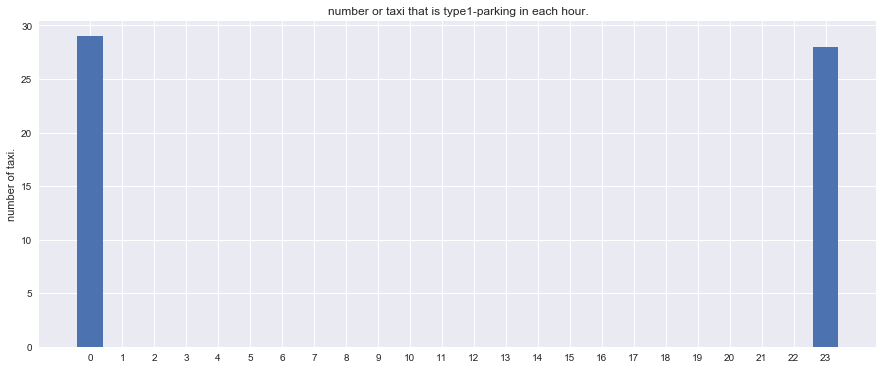

In [47]:
fig = plt.figure(figsize=(15,6))
plt.bar(range(0,24), to_plot1)
plt.title('number or taxi that is type1-parking in each hour.')
plt.ylabel('number of taxi.')
# plt.xlim(0,24)
plt.xticks(range(0,24))
plt.savefig('Output/graph/graph_type1.png')
plt.show()

# plt.xlable('')

### type 2 - driving along - 

In [ ]:
feature_2 = folium.FeatureGroup(name="type2 - driving along")

In [48]:
def check_type2(data, cut_value):
#     print(data.displacement*1000, cut_value*data.trip_time)
    t = abs(data.heading_all-data.direction)
    if(t > 180): t -= 180
    diff_dist=(data.distance-data.displacement)
    ratio=(data.distance/data.displacement)
    
    if((t<20) &(data.distance*1000/data.trip_time >0.25)):
        return True
#             elif((diff_dist<5) & (data.trip_time < 5*60) & (ratio<1) ):
#                 add=True
    elif(data.distance/data.displacement < cut_value):
        return True     
            
    

In [50]:
count=0
to_plot3=[]
tree=0
mmmap = folium.Map(location=[13.741229, 100.554225], zoom_start=14, tiles='cartodbpositron')
to_plot2=[]
for h in range(24):
    temp = gen_data[gen_data['timestamp'].dt.hour == h]
    count=0
    tree=0
    if(type(type1_cut[h]) != int):
        type1_cut_value = type1_cut[h].right
    for n, data in temp.iterrows():

        add=False
        if(data.displacement>0):
            if(check_type1(data, type1_cut_value)):
                continue
            elif(check_type2(data, type2_cut[h])):
                add=True
            
            if(add):
#                 s = str(count)
#                 print(s)
#                 f = folium.FeatureGroup(name=s)
#                 data.line.add_to(f)
#                 data['dot'].add_to(f)
#                 f.add_to(mmmap)

                count+=1
            else:
                
                tree+=1
#     if(h == 6): break
    to_plot2.append(count)
    to_plot3.append(tree)

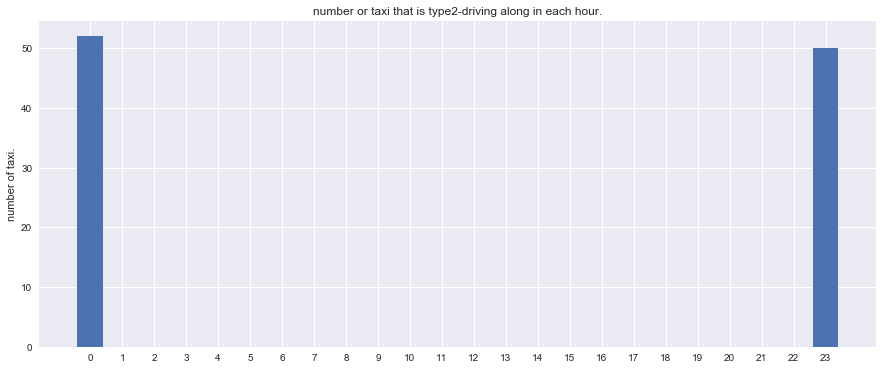

In [51]:
to_plot2
fig = plt.figure(figsize=(15,6))
plt.bar(range(0,24), to_plot2)
plt.title('number or taxi that is type2-driving along in each hour.')
plt.ylabel('number of taxi.')
# plt.xlim(0,24)
plt.xticks(range(0,24))
plt.savefig('Output/graph/graph_type2.png')
plt.show()



In [52]:
to_plot3


[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13]

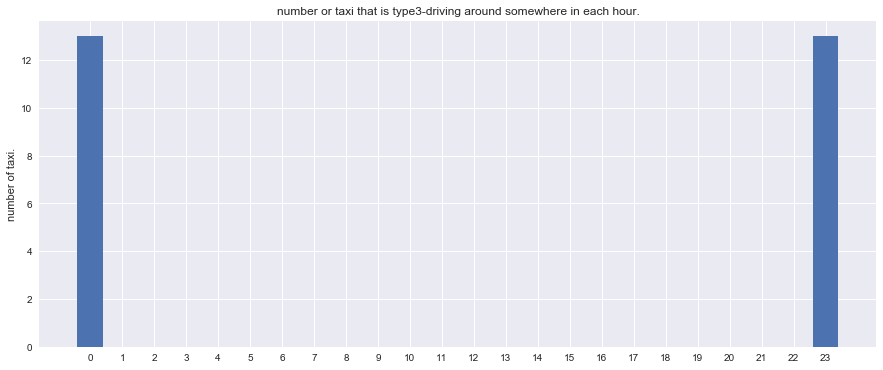

In [53]:

fig = plt.figure(figsize=(15,6))
plt.bar(range(0,24), to_plot3)
plt.title('number or taxi that is type3-driving around somewhere in each hour.')
plt.ylabel('number of taxi.')
# plt.xlim(0,24)
plt.xticks(range(0,24))
plt.savefig('Output/graph/graph_type3.png')
plt.show()

## type 3 - driving around some area

## Summary

In [54]:
percent_1 = []
percent_2 = []
percent_3 = []
for i in range(24):
    sum = to_plot1[i] + to_plot2[i] + to_plot3[i]
    # percent of each type
    percent_1.append(0 if sum == 0 else to_plot1[i] * 100/ sum)
    percent_2.append(0 if sum == 0 else to_plot2[i] * 100/ sum)
    percent_3.append(0 if sum == 0 else to_plot3[i] * 100/ sum)

### Plotting : กราฟพฤติกรรมการขับรถของรถแท็กซี่ ในเวลต่าง ๆ (แบ่งเป็นชั่วโมง)

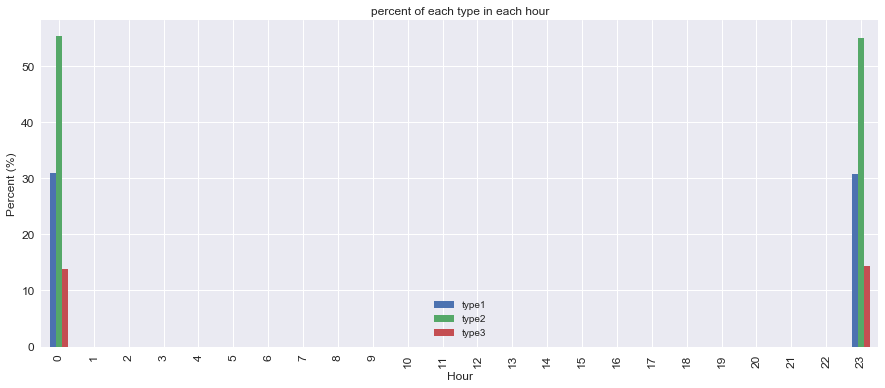

In [56]:
plot = pd.DataFrame({'type1': percent_1, 'type2': percent_2, 'type3': percent_3})
ax=plot[['type1', 'type2', 'type3']].plot(kind='bar', title ="percent of each type in each hour", figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)
plt.savefig('Output/graph/summary.png')
plt.show()



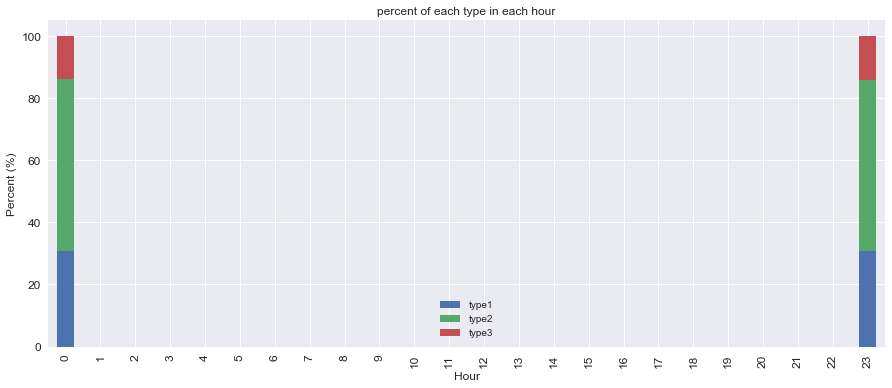

In [57]:
ax=plot[['type1', 'type2', 'type3']].plot(kind='bar', stacked=True, title ="percent of each type in each hour", figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)
plt.savefig('Output/graph/summary_stack.png')
plt.show()




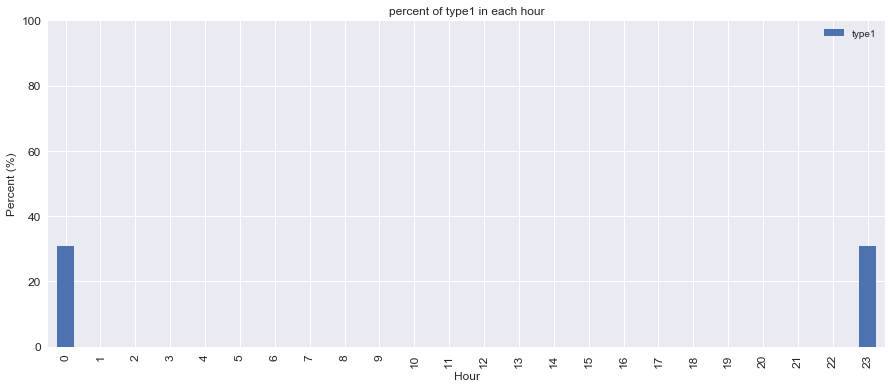

In [58]:
ax=plot[['type1']].plot(kind='bar', title ="percent of type1 in each hour", figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)
plt.savefig('Output/graph/summary_type1.png')
plt.ylim(0,100)
plt.show()

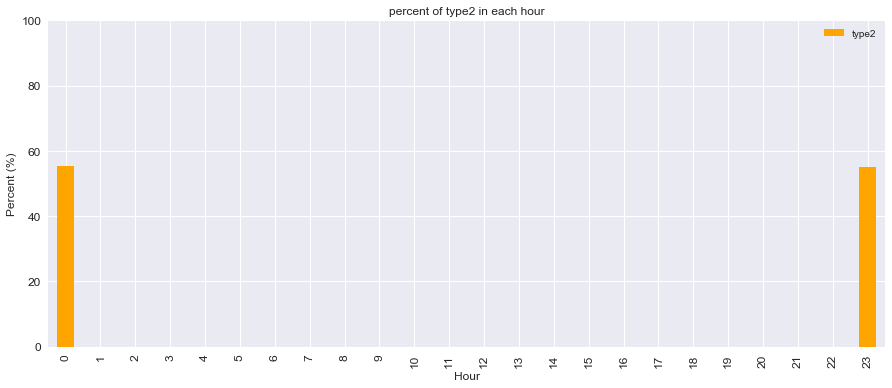

In [59]:
ax=plot[['type2']].plot(kind='bar', title ="percent of type2 in each hour", figsize=(15,6), legend=True, fontsize=12, color='orange')
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)
plt.savefig('Output/graph/summary_type2.png')
plt.ylim(0,100)
plt.show()

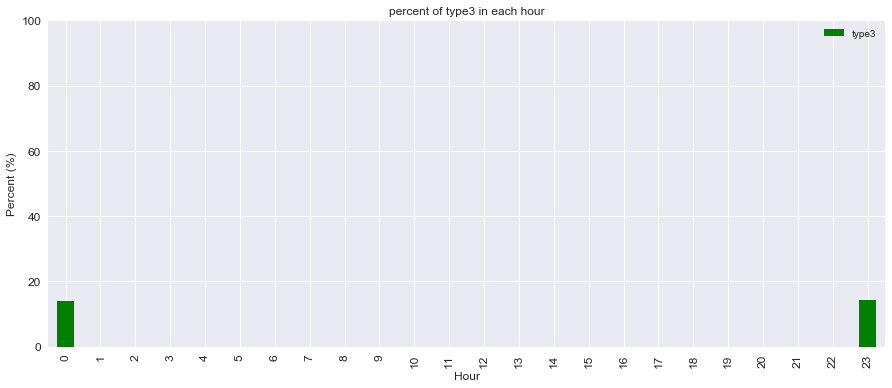

In [60]:
ax=plot[['type3']].plot(kind='bar', title ="percent of type3 in each hour", figsize=(15,6), legend=True, fontsize=12, color='green')
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)
plt.savefig('Output/graph/summary_type3.png')
plt.ylim(0,100)
plt.show()

### Plotting : กราฟระหว่างระยะที่ใช้ในการหาผู้โดยสารกับจำนวนรถแท็กซี่

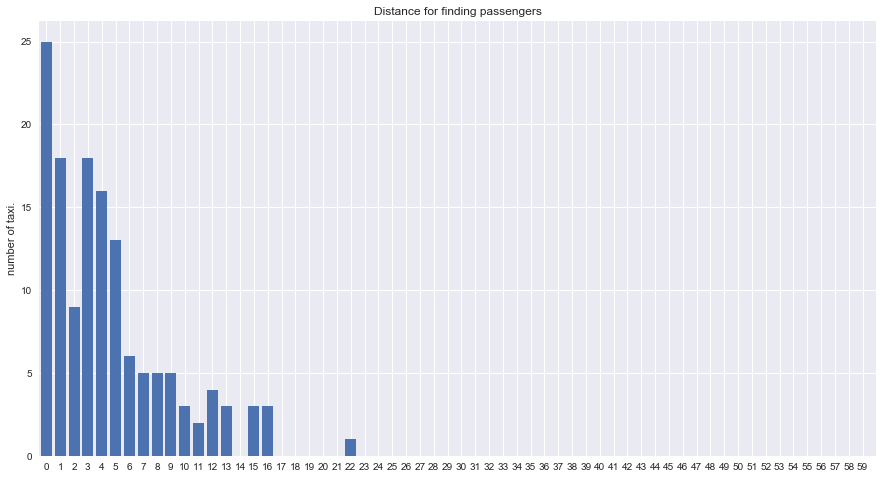

In [61]:
cut = range(0,61)
plot_dist = gen_data.groupby(pd.cut(gen_data['distance'], cut)).count()
plot_dist.shape
fig = plt.figure(figsize=(15,8))
plt.bar(range(0,60), plot_dist['distance'])
plt.title('Distance for finding passengers')
plt.ylabel('number of taxi.')
plt.xlim(-.5,60)
plt.xticks(range(0,60))
plt.savefig('Output/graph/graph_dist.png')
plt.show()

In [62]:
def addRecord(record, tid):
    global route
    route=route.append({'coordinate':([float(record.latitude)] + [float(record.longitude)]), 'timestamp': record.gps_timestamp, 'trip_id': tid}, ignore_index=True)


In [63]:
taxi_id = df_xml.vehicle_id.unique()
route_collection=pd.DataFrame()
type(route_collection)

pandas.core.frame.DataFrame

### find the number of trip 
-- defined taxi driver denied passenger 
-- by driving time that the light off is not more than 200s.

In [64]:
count_trip = pd.DataFrame(columns=['taxi_id', 'count', 'clean'])
# taxi_id = gen_data.taxi_id.unique()

In [66]:
state = 'start'

for i in taxi_id:
    temp_df = df_xml[df_xml.vehicle_id == i]
    count = 0
    clean = 0
    state = 'start'
    for index, row in temp_df.iterrows():
#     print(temp_df)
        if((row.taxi_passenger_flag == '1') & (state == 'start')):
#         ignore : waiting for passenger_flag 1
            state = 'waiting'
        elif((row.taxi_passenger_flag == '0') & (state == 'waiting')):
#         play with it
            prev_timestamp=row.gps_timestamp
            count += 1
            state = 'taken'
        elif((row.taxi_passenger_flag == '1') & (state == 'taken')):
            if((row.gps_timestamp-prev_timestamp).seconds < 200):
                clean +=1
            state = 'waiting'
    print(i, count, clean)
    count_trip = count_trip.append({'taxi_id': i, 'count': count, 'clean': count-clean},ignore_index=True )
    

In [68]:
plot = pd.DataFrame({'count_pure': count_trip.groupby('count').count().clean, 'clean_count': count_trip.groupby('clean').count().taxi_id})
plot = plot[1:]
ax=plot[['count_pure','clean_count']].plot(kind='bar', title ="Graph number of trip", figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel("number of trip", fontsize=12)
ax.set_ylabel("number of taxi", fontsize=12)

plt.savefig('Output/graph/sum_count_trip.png')
plt.show()



TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
count_trip_p = pd.DataFrame(columns=['taxi_id', 'count'])
# state = 'start'

tid = 0
for i in taxi_id:
    temp_df = df_xml[df_xml.vehicle_id == i]
    count = 0

    state = 'start'
    for index, row in temp_df.iterrows():
#     print(temp_df)
        if((row.taxi_passenger_flag == '0') & (state == 'start')):
#         ignore : waiting for passenger_flag 1
            state = 'waiting'
        elif((row.taxi_passenger_flag == '1') & (state == 'waiting')):
#         play with it
            count += 1
            state = 'count'
        elif((row.taxi_passenger_flag == '0') & (state == 'count')):
            state = 'waiting'
    print(i, ' : ', count)
    count_trip_p = count_trip.append({'taxi_id': i, 'count': count},ignore_index=True )
    

In [69]:
count_trip

,taxi_id,count,clean


In [33]:
max_trip=count_trip[count_trip['count']==max_count].taxi_id.iloc[0]
temp_df = df_xml[df_xml['vehicle_id']==max_trip]

In [71]:
# df = df.reset_index(drop=True)
temp_df = temp_df.reset_index(drop=True)
temp_df

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line,hour
0,AK2774,2016-01-31 23:59:16,0.000000,0.000000,0.0,000,330.000000,360.000000,"[[13.787786,100.691942]]",23
1,AK2784,2016-01-31 23:59:45,16.377471,16.252548,1020.0,000,82.658874,78.361432,"[[13.712228,100.643898],[13.713968,100.647192]...",23
2,AK2860,2016-01-31 23:59:38,4.361275,3.199557,540.0,000,95.023875,73.625928,"[[13.710083,100.629198],[13.710946,100.636918]...",23
3,AK2875,2016-01-31 23:59:29,3.467152,2.364637,1080.0,000,4.078487,357.042312,"[[13.596174,100.609627],[13.595867,100.606674]...",23
4,AK2890,2016-01-31 23:58:05,5.365110,4.550068,1014.0,000,135.305863,155.612043,"[[13.7388,100.534672],[13.738208,100.534851],[...",23
5,AK2894,2016-01-31 23:59:02,22.495774,18.824106,1020.0,000,205.171757,186.523542,"[[13.893587,100.586881],[13.882826,100.580931]...",23
6,AK2916,2016-01-31 23:59:29,12.525728,6.536290,1200.0,000,101.988523,148.681694,"[[13.813463,100.557664],[13.818486,100.558476]...",23
7,AK2976,2016-01-31 23:59:46,8.377079,8.117632,1200.0,000,184.772050,180.077783,"[[14.117963,100.622021],[14.117716,100.620229]...",23
8,AK3033,2016-01-31 23:57:47,7.006402,4.013887,997.0,000,63.364220,37.432156,"[[13.70953,100.54101],[13.713454,100.54511],[1...",23
9,AK3035,2016-01-31 23:59:24,12.031818,1.760341,720.0,000,288.299469,337.039312,"[[13.891831,100.56413],[13.896202,100.551735],...",23


### find the number of trip that taxi driver denied passenger 
-- by driving time that the light off is not more than 200s.

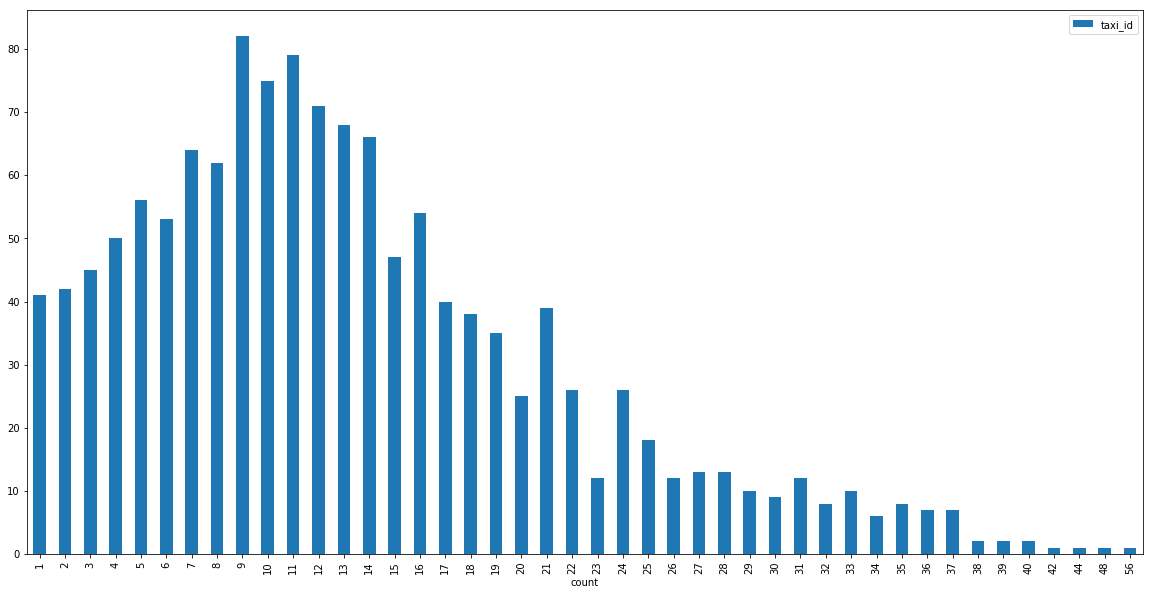

In [44]:
toplot=cal_count_trip.groupby('count').count()
toplot=toplot.drop([0])
toplot_c = toplot
ax=toplot.plot(kind='bar', figsize=(20,10), title ="Graph number of trips")
ax.set_xlabel("number of trip", fontsize=12)
ax.set_ylabel("number of taxi", fontsize=12)
plt.savefig('Output/graph/cal_count_trip.png')



In [46]:
toplot_c

,taxi_id
count,
1,41
2,42
3,45
4,50
5,56
6,53
7,64
8,62
9,82


In [47]:
plot = pd.DataFrame({'count_pure': toplot_p.taxi_id, 'clean_count_trip': toplot_c.taxi_id})

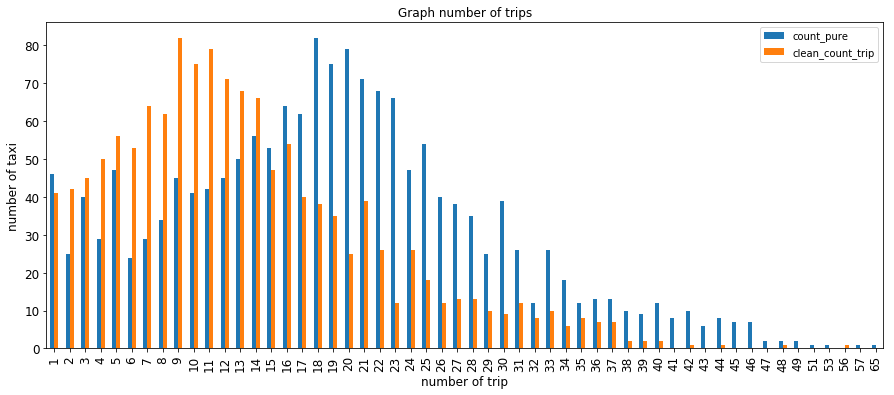

In [51]:
# plot = pd.DataFrame({'count_pure': count_trip, 'clean_count_trip': cal_count_trip})
ax=plot[['count_pure', 'clean_count_trip']].plot(kind='bar', title ="Graph number of trips", figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel("number of trip", fontsize=12)
ax.set_ylabel("number of taxi", fontsize=12)
plt.savefig('Output/graph/sum_count_trip.png')
plt.show()




In [ ]:
prev_status = ['1']
count=0
for ind, data in temp_df.iterrows():
#     break
#     print(ind, prev_status)
    if((data.taxi_passenger_flag == '1') & (prev_status[-1] == '0')):
        prev_status.pop()
        if(len(prev_status)==0):
            if((data.gps_timestamp-prev_timestamp).seconds < 200):
                count+=1
        elif(prev_status[-1] == '1'):
            if((data.gps_timestamp-prev_timestamp).seconds < 200):
                count+=1
        prev_status=['1']
    elif((data.taxi_passenger_flag == '0') & (prev_status[-1] != '0')):
        prev_timestamp=data.gps_timestamp
        prev_status.append('0')
print(count)

## find and plot speed graph in each hour

In [72]:
velo = []
acce = []
for i in range(24):
    hour = gen_data[gen_data['timestamp'].dt.hour == i]
    temp_velo=[]
    temp_acce=[]
    temp_v=0
    temp_a=0
    for i, row in hour.iterrows():
        if(row.trip_time >0):
            temp_velo.append(row.distance*1000/(row.trip_time))
            temp_acce.append(row.displacement*1000/(row.trip_time))
            temp_v = np.mean(temp_velo)
            temp_a = np.mean(temp_acce)
#     f = np.ma.masked_greater(temp_velo,0)
    velo.append(temp_v)
#     f = np.ma.masked_greater(temp_acce,0)
    acce.append(temp_a)


In [73]:
velo

[8.5700367367453154,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.2040599128059419]

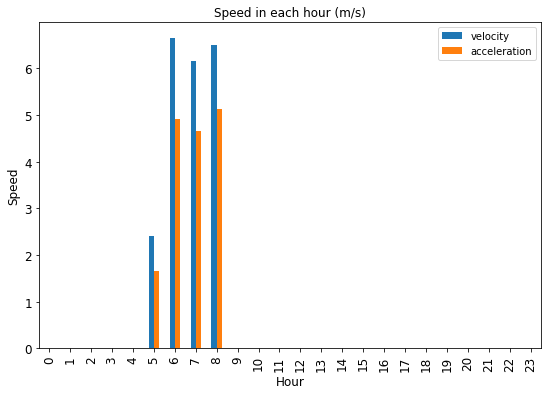

In [16]:
plot = pd.DataFrame({'velocity': velo, 'acceleration': acce})
ax=plot[['velocity', 'acceleration']].plot(kind='bar', title ="Speed in each hour (m/s)", figsize=(9,6), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Speed", fontsize=12)
plt.savefig('Output/graph/sum_count_trip.png')
plt.show()

In [17]:
sum=0
for i in range(24):
    sum+= velo[i]-acce[i]
    print(i, velo[i]-acce[i])

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0.7470678488684166)
(6, 1.7326436836165646)
(7, 1.5027899399082179)
(8, 1.3668336862412804)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)


# <span style="background: yellow"> For 'OD' data </span>

## Density function

In [18]:
def density_map(latitudes, longitudes, center, hr, plot, trip, bins=150, radius=0.4):  
    cmap = copy(plt.cm.magma)
    cmap.set_bad((0,0,0))  # Fill background with black

    # Center the map around the provided center coordinates
    histogram_range = [
#         [center[1] - radius, center[1] + radius],
#         [center[0] - radius, center[0] + radius]
        [100.32698245577569, 100.92425866080856],
        [13.489325262000136, 13.949794826969693]
    ]
    
    fig = plt.figure(figsize=(14,9))
    two = plt.hist2d(longitudes, latitudes, bins=bins, norm=LogNorm(),
               cmap=cmap, range=histogram_range,cmax=2000)

    # Remove all axes and annotations to keep the map clean and simple
    if(plot):
        
        plt.grid('off')
        plt.axis('off')
        fig.axes[0].get_xaxis().set_visible(False)
        fig.axes[0].get_yaxis().set_visible(False)
        fig.colorbar(two[3])
        plt.tight_layout()
        plt.show()
        if(trip == 'D'):
            fig.savefig('Output/map_d/densmap_'+('00'+str(hr))[len(str(hr)):len(str(hr))+2]+'.png')
        elif(trip == 'O'):
            fig.savefig('Output/map_o/densmap_'+('00'+str(hr))[len(str(hr)):len(str(hr))+2]+'.png')
        
    print(type(two))
   
    return two

In [24]:
dataod['dt'] = pd.to_datetime(dataod['dt'])

## data at 5.00am - 9.00am - 20160201


In [25]:
datad = dataod[dataod.tripstatus == 'D']
datad

,taxiid,valid_flag,heading,dt,timediff,latitude,longitude,displacement,speed,speedbycal,...,tripstatus,triptime,tripdisplacement,trip_maxdist,trip_maxspeed,trip_maxtime,trip_q25speed,trip_q25speedbycal,trip_q50speed,trip_q50speedbycal
0,AK3954,1,78,2016-08-24 11:46:36,1.000000,13.843136,100.493958,41.912713,0,2.514763,...,D,-,1099.959320,406.661299,29.000000,2.0,0.0,2.514763,6.5,6.777831
2,AK3954,1,102,2016-08-24 12:29:36,1.000000,13.859781,100.518295,0.000000,0,0.000000,...,D,-,1916.852556,704.892492,57.000000,2.0,0.0,0.000000,0.0,0.000000
5,AT1982,1,112,2016-08-04 12:09:35,1.000000,13.775799,100.529320,146.965132,20,8.817908,...,D,-,2004.909225,469.517806,27.000000,2.0,2.0,6.456411,9.0,12.055352
7,AT1982,1,108,2016-08-04 12:54:35,1.000000,13.731029,100.585381,14.027947,0,0.841677,...,D,-,744.455862,449.813464,22.000000,2.0,1.2,5.902768,3.0,13.494404
9,AT1982,1,304,2016-08-04 13:15:23,1.000000,13.728121,100.573334,25.873643,0,1.552419,...,D,-,95.302532,69.428889,4.165733,1.0,0.0,2.075082,0.0,2.859076
11,AT1982,1,69,2016-08-04 15:03:25,1.000000,13.726383,100.528030,44.645047,15,2.678703,...,D,-,978.834583,190.198575,15.000000,2.0,0.0,3.555445,4.0,5.070883
13,AT1982,1,36,2016-08-04 15:56:25,1.000000,13.748030,100.563492,9.289693,0,0.557382,...,D,-,271.406614,248.660695,14.919642,2.0,0.0,0.465165,0.0,0.557382
15,AK3615,1,314,2016-09-23 10:06:32,1.366667,13.951999,100.547401,44.062540,6,1.934453,...,D,-,8270.506722,1287.203696,50.586009,2.0,0.0,0.312033,15.0,16.726012
17,AK3615,1,129,2016-09-23 10:32:18,1.000000,13.991448,100.581375,602.754666,0,36.165280,...,D,-,9409.446940,946.138623,60.000000,2.0,3.0,12.610792,36.0,36.165280
19,AK3615,1,163,2016-09-23 11:28:56,1.000000,13.989754,100.615685,0.000000,0,0.000000,...,D,-,6506.429641,1216.145932,43.000000,2.0,0.0,0.000000,10.0,8.366847


In [30]:
datao = dataod[dataod.tripstatus == 'O']
datao

,taxiid,valid_flag,heading,dt,timediff,latitude,longitude,displacement,speed,speedbycal,...,tripstatus,triptime,tripdisplacement,trip_maxdist,trip_maxspeed,trip_maxtime,trip_q25speed,trip_q25speedbycal,trip_q50speed,trip_q50speedbycal
1,AK3954,1,111,2016-08-24 11:57:36,1.000000,13.863161,100.500946,431.198573,34,25.871914,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,AK3954,1,267,2016-08-24 12:40:36,1.000000,13.853083,100.525101,92.847135,15,5.570828,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,AT1982,1,295,2016-08-04 11:59:35,1.000000,13.784423,100.513062,0.000000,0,0.000000,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,AT1982,1,178,2016-08-04 12:50:35,1.000000,13.728193,100.580887,0.000000,0,0.000000,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,AT1982,1,304,2016-08-04 13:13:23,2.000000,13.727455,100.573845,153.669818,0,4.610095,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,AT1982,1,243,2016-08-04 14:53:25,1.000000,13.727269,100.523109,183.353328,9,11.001200,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,AT1982,1,51,2016-08-04 15:52:25,1.000000,13.745791,100.563042,107.448938,7,6.446936,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,AT1982,1,100,2016-08-04 16:06:25,1.000000,13.750141,100.572754,114.650090,4,6.879005,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
16,AK3615,1,314,2016-09-23 10:14:18,1.766667,13.951915,100.547722,15.594768,3,0.529634,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
18,AK3615,1,129,2016-09-23 11:01:56,2.633333,13.991448,100.581520,0.000000,0,0.000000,...,O,-,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### plot density graph 24hr of 'D' trip

0


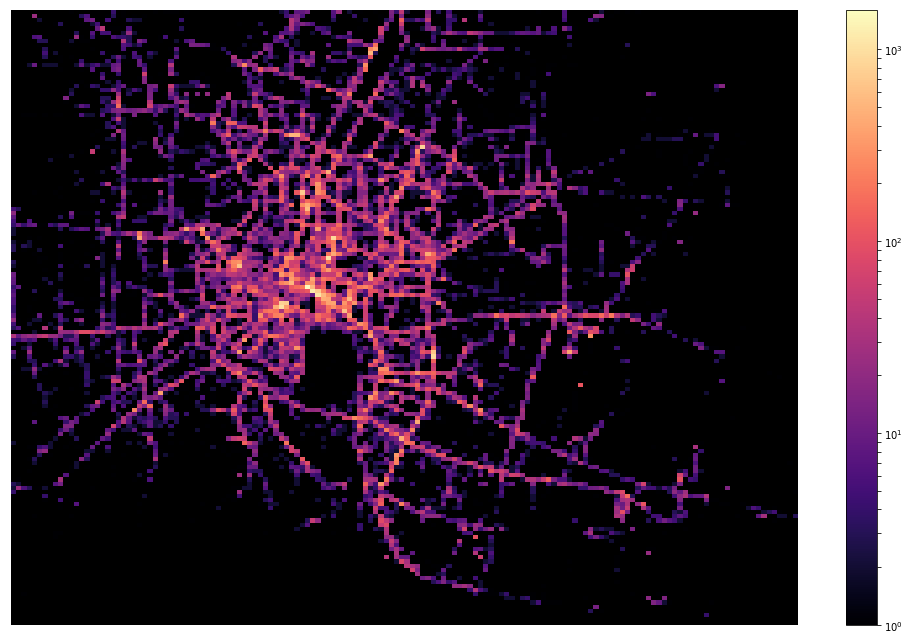

<type 'tuple'>
0.0
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.0039818413

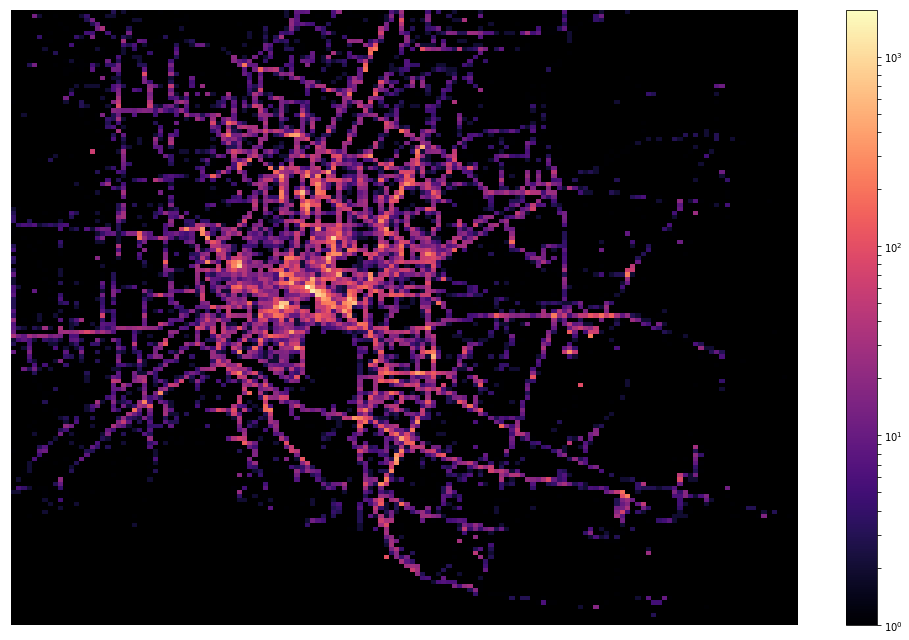

<type 'tuple'>
-0.597276205033
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688


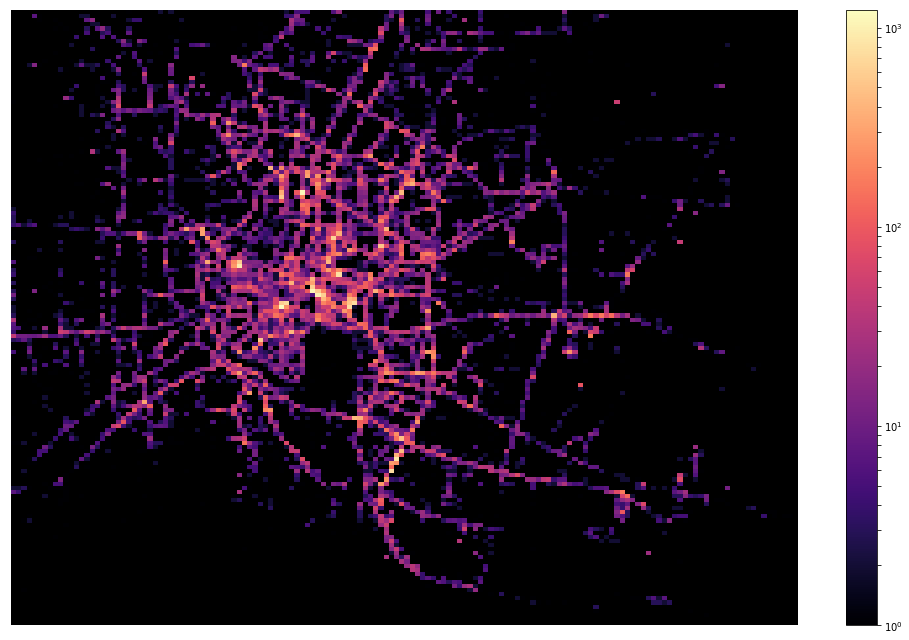

<type 'tuple'>
-0.597276205033
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688


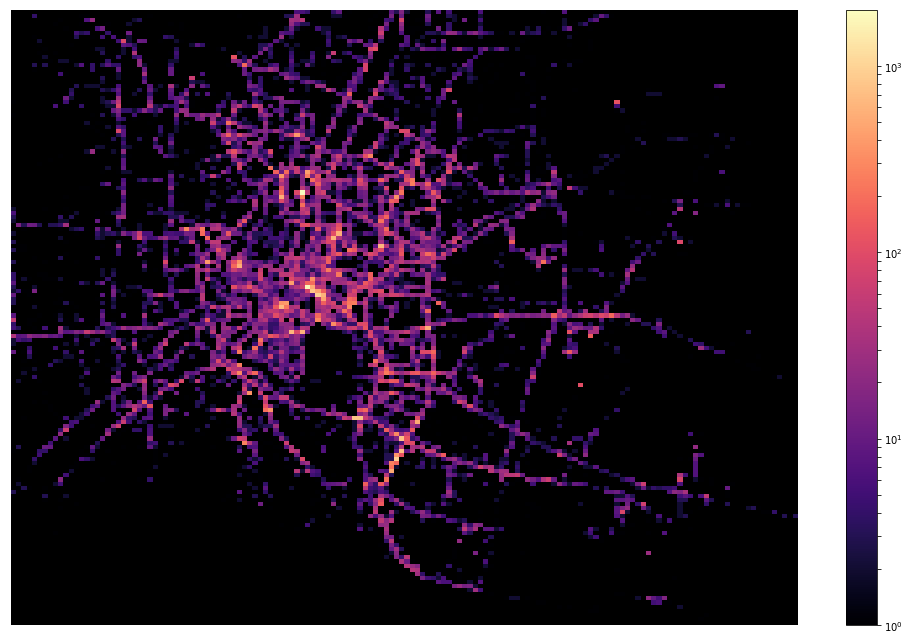

<type 'tuple'>
-0.597276205033
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688


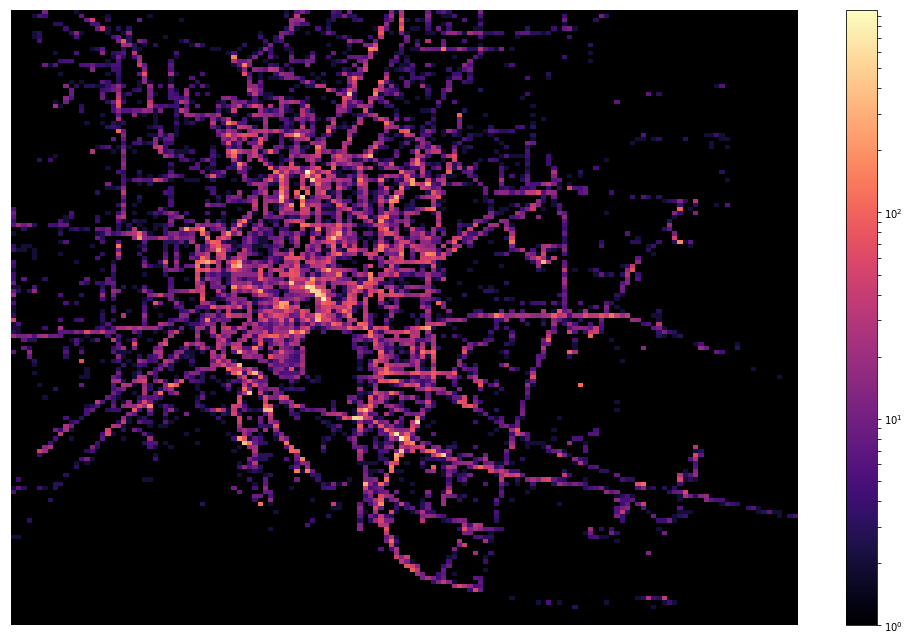

<type 'tuple'>
-0.597276205033
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688


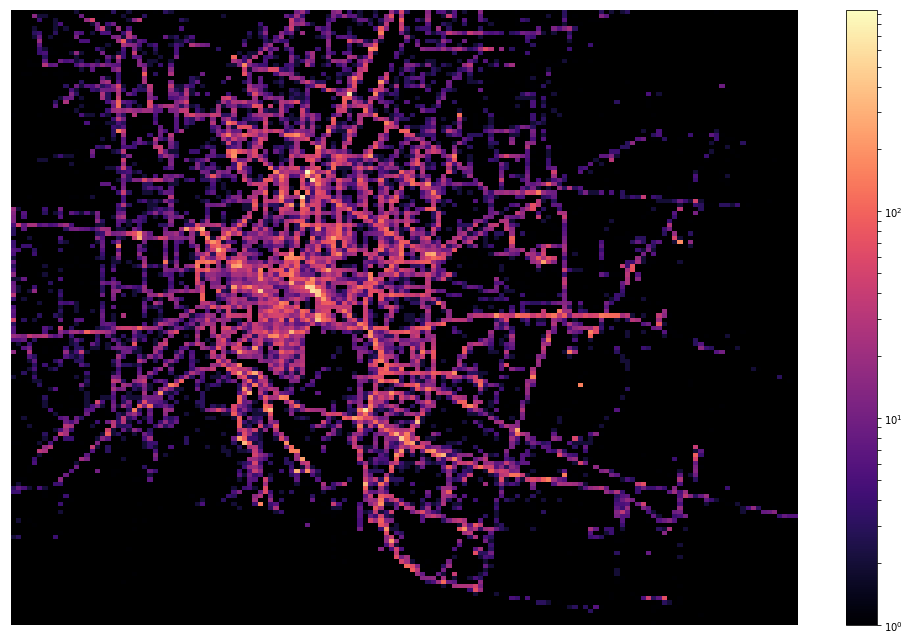

<type 'tuple'>
-0.597276205033
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136689
0.00398184136688
0.00398184136688
0.00398184136689
0.00398184136688


KeyboardInterrupt: 

In [29]:
dff=0
bkk = [13.7563, 100.5018]
for i in range(24):
    print(i)
    tempd = datad[(datad['dt'].dt.hour == i)]
    tempo = datao[(datao['dt'].dt.hour == i)]
    figd = density_map(tempd.latitude, tempd.longitude, center=bkk, hr=i, plot=True, trip='D')
    figo = density_map(temp.latitude, temp.longitude, center=bkk, hr=i, plot=True, trip='O')
    for g in fig[1]:
        if(dff==0):
            dff=g
        print(g-dff)
        dff=g
    

In [74]:
list_type=[]
for i, data in gen_data.iterrows():
    type_ = 0
    type1_cut_value = 0
    h=data.timestamp.hour
    if(type(type1_cut[h]) != int):
        type1_cut_value = type1_cut[h].right
    if(check_type1(data, type1_cut_value)):
        type_ = 1
    elif(check_type2(data, type2_cut[h])):
        type_ = 2
    else: type_ = 3
    list_type.append(type_)
    

In [75]:
gen_data['type'] = list_type

In [76]:
gen_data

,taxi_id,timestamp,distance,displacement,trip_time,trip_id,heading_all,direction,line,hour,type
0,AK2770,2016-02-01 00:00:07,3.374915,2.901152,420.0,000,217.976967,219.253540,"[[13.724985,100.456752],[13.721133,100.458168]...",0,2
1,AK2774,2016-01-31 23:59:16,0.000000,0.000000,0.0,000,330.000000,360.000000,"[[13.787786,100.691942]]",23,1
2,AK2784,2016-01-31 23:59:45,16.377471,16.252548,1020.0,000,82.658874,78.361432,"[[13.712228,100.643898],[13.713968,100.647192]...",23,2
3,AK2807,2016-02-01 00:08:36,5.024445,4.670281,541.0,000,155.284483,174.947926,"[[13.818931,100.559404],[13.815329,100.559406]...",0,2
4,AK2852,2016-02-01 00:00:04,0.725418,0.725013,120.0,000,176.012765,180.543222,"[[13.827836,100.59182],[13.82425,100.59182],[1...",0,1
5,AK2852,2016-02-01 00:10:04,3.436178,2.221416,420.0,000,62.005997,29.053867,"[[13.8298,100.57307],[13.831682,100.575562],[1...",0,3
6,AK2860,2016-01-31 23:59:38,4.361275,3.199557,540.0,000,95.023875,73.625928,"[[13.710083,100.629198],[13.710946,100.636918]...",23,3
7,AK2862,2016-02-01 00:05:59,0.000000,0.000000,180.0,000,275.000000,360.000000,"[[13.755765,100.567154],[13.755765,100.567154]]",0,1
8,AK2875,2016-01-31 23:59:29,3.467152,2.364637,1080.0,000,4.078487,357.042312,"[[13.596174,100.609627],[13.595867,100.606674]...",23,3
9,AK2890,2016-01-31 23:58:05,5.365110,4.550068,1014.0,000,135.305863,155.612043,"[[13.7388,100.534672],[13.738208,100.534851],[...",23,2


# Generate JSON data for Visualization.

In [77]:
gen_data.to_json('Output/json_data/gen_data.json', orient='records')


In [78]:
(count_trip[count_trip['clean']>0].taxi_id).to_json('Output/json_data/taxi_id.json', orient='records')